# This notebook is code to accompany article 5 SMOTE Techniques for Oversampling your Imbalance Data

Article: https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5?sk=d1c0244f7a10d5c70f4977130112c50d

Dataset: https://www.kaggle.com/shubh0799/churn-modelling

In [1]:
df = pd.read_csv('churn.csv')

In [2]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Churn Count')

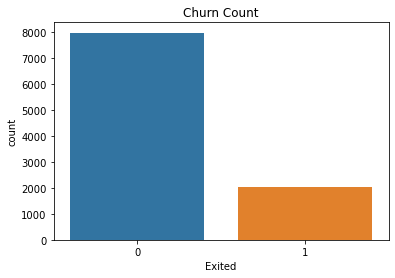

In [4]:
sns.countplot(df['Exited'])
plt.title('Churn Count')

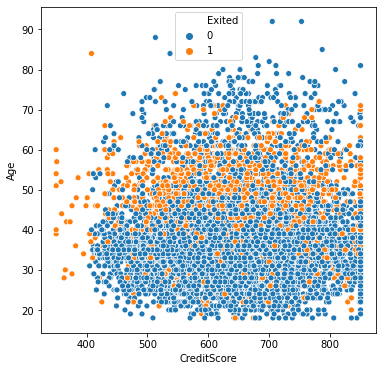

In [5]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df, x ='CreditScore', y = 'Age', hue = 'Exited')

In [6]:
df_example = df[['CreditScore', 'Age', 'Exited']]

In [7]:
from imblearn.over_sampling import SMOTE

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in versi

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df[['CreditScore', 'Age']], df['Exited'])
df_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
df_oversampler['Exited'] = y

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Oversampled Churn Count')

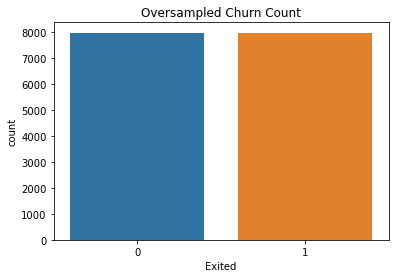

In [9]:
sns.countplot(df_oversampler['Exited'])
plt.title('Oversampled Churn Count')

Text(0.5, 1.0, 'SMOTE')

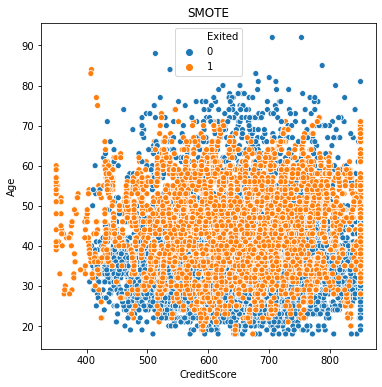

In [10]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df_oversampler, x ='CreditScore', y = 'Age', hue = 'Exited')
plt.title('SMOTE')

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_example[['CreditScore', 'Age']], df['Exited'], test_size = 0.2,
                                                    stratify = df['Exited'], random_state = 101)

In [13]:
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state = 101)

X_oversample_borderline, y_oversample_borderline = bsmote.fit_resample(X_train, y_train)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state = 101)

X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=Fut

In [38]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = 101)

X_oversample_ada, y_oversample_ada = adasyn.fit_resample(X_train, y_train)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
classifier_o = LogisticRegression()
classifier_o.fit(X_oversample, y_oversample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
classifier_border = LogisticRegression()
classifier_border.fit(X_oversample_borderline, y_oversample_borderline)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
classifier_svm = LogisticRegression()
classifier_svm.fit(X_oversample_svm, y_oversample_svm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
classifier_ada = LogisticRegression()
classifier_ada.fit(X_oversample_ada, y_oversample_ada)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.19      0.04      0.07       407

    accuracy                           0.77      2000
   macro avg       0.49      0.50      0.47      2000
weighted avg       0.67      0.77      0.71      2000



In [21]:
print(classification_report(y_test, classifier_o.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.73      0.79      1593
           1       0.36      0.60      0.45       407

    accuracy                           0.70      2000
   macro avg       0.62      0.66      0.62      2000
weighted avg       0.77      0.70      0.72      2000



In [22]:
print(classification_report(y_test, classifier_border.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1593
           1       0.35      0.60      0.45       407

    accuracy                           0.69      2000
   macro avg       0.61      0.66      0.62      2000
weighted avg       0.77      0.69      0.72      2000



In [23]:
print(classification_report(y_test, classifier_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1593
           1       0.37      0.57      0.45       407

    accuracy                           0.72      2000
   macro avg       0.62      0.66      0.63      2000
weighted avg       0.77      0.72      0.74      2000



In [40]:
print(classification_report(y_test, classifier_ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.56      0.68      1593
           1       0.28      0.65      0.39       407

    accuracy                           0.58      2000
   macro avg       0.57      0.61      0.53      2000
weighted avg       0.74      0.58      0.62      2000



In [24]:
df_example = df[['CreditScore', 'IsActiveMember', 'Exited']]

In [25]:
df_example

,CreditScore,IsActiveMember,Exited
0,619,1,1
1,608,1,0
2,502,0,1
3,699,0,0
4,850,1,0
...,...,...,...
9995,771,0,0
9996,516,1,0
9997,709,1,1
9998,772,0,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_example[['CreditScore', 'IsActiveMember']],
                                                    df['Exited'], test_size = 0.2,
                                                    stratify = df['Exited'], random_state = 101)

In [27]:

#Import the SMOTE-NC
from imblearn.over_sampling import SMOTENC

#Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are.
#In this case, 'IsActiveMember' is positioned in the second column
#we input [1] as the parameter. If you have more than one categorical columns, just input all the columns position

smotenc = SMOTENC([1],random_state = 101)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [28]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
classifier_o = LogisticRegression()
classifier_o.fit(X_oversample, y_oversample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(classification_report(y_test, classifier_o.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.56      0.68      1593
           1       0.28      0.65      0.39       407

    accuracy                           0.58      2000
   macro avg       0.57      0.61      0.53      2000
weighted avg       0.74      0.58      0.62      2000



In [32]:
df_example = df[['CreditScore', 'Age', 'Exited']]

from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state = 101)
X, y = bsmote.fit_resample(df[['CreditScore', 'Age']], df['Exited'])
df_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
df_oversampler['Exited'] = y

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Borderline SMOTE')

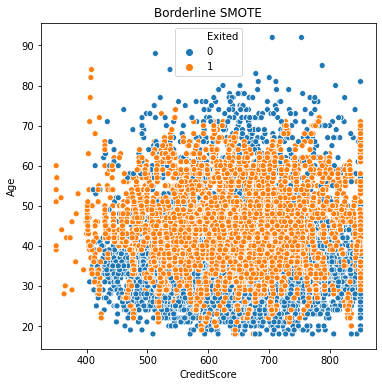

In [33]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df_oversampler, x ='CreditScore', y = 'Age', hue = 'Exited')
plt.title('Borderline SMOTE')

In [34]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state = 101)
X, y = svmsmote.fit_resample(df[['CreditScore', 'Age']], df['Exited'])
df_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
df_oversampler['Exited'] = y


C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=Fut

Text(0.5, 1.0, 'SVM SMOTE')

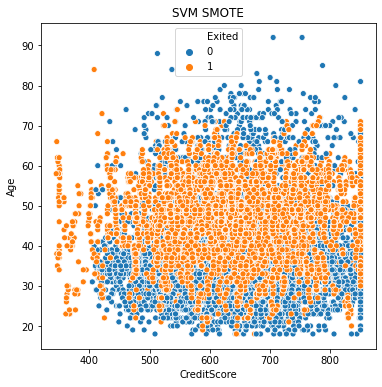

In [35]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df_oversampler, x ='CreditScore', y = 'Age', hue = 'Exited')
plt.title('SVM SMOTE')

In [36]:
from imblearn.over_sampling import ADASYN
svmsmote = ADASYN(random_state = 101)
X, y = svmsmote.fit_resample(df[['CreditScore', 'Age']], df['Exited'])
df_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
df_oversampler['Exited'] = y


C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ADASYN')

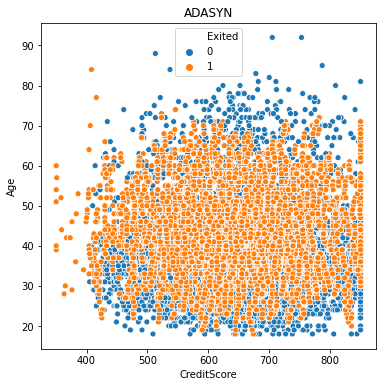

In [37]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df_oversampler, x ='CreditScore', y = 'Age', hue = 'Exited')
plt.title('ADASYN')